# 초기 데이터 구성

In [1]:
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [2]:
import pandas as pd
from datetime import datetime, timedelta

xlsx = pd.read_excel('datas.xlsx', 
                    header = None, 
                    skiprows = 2,
                    engine = 'openpyxl')

datas = {};
for col in xlsx:
    if col > 6: # startcol 7
        datas[f'{xlsx[col][0]}-{xlsx[col][1]}-{xlsx[col][2]}'] = xlsx[col][3:]
        
def datetime_range(start, end, delta):
        current = start
        while current < end:
                yield current
                current += delta
dts = [dt.strftime('%Y%m%d %H:%M') for dt in
            datetime_range(datetime(2018,5,1,0), datetime(2019,5,1,0), timedelta(minutes = 15))]

df = pd.DataFrame(datas)

In [67]:
df = df.fillna(0)
sDatas = []

for idx in df['아파트1-104-1206']:
    sDatas.append(idx)

dts = [dt.strftime('%Y%m%d') for dt in
            datetime_range(datetime(2018,5,1,0), datetime(2019,5,1,0), timedelta(days = 1))]

sData = {}
dtIdx = 0
for idx in range(3,len(sDatas),96):
    sData[dts[dtIdx]] = pd.Series(sDatas[idx: idx + 96])
    dtIdx += 1
sDf = pd.DataFrame(sData)
sDf = sDf.fillna(0)
initDf = sDf.copy()
sDf = sDf.T
sDf
initDf

,20180501,20180502,20180503,20180504,20180505,20180506,20180507,20180508,20180509,20180510,...,20190421,20190422,20190423,20190424,20190425,20190426,20190427,20190428,20190429,20190430
0,0.085,0.051,0.037,0.064,0.081,0.097,0.052,0.086,0.068,0.053,...,0.058,0.020,0.012,0.008,0.022,0.029,0.007,0.075,0.019,0.022
1,0.084,0.050,0.046,0.074,0.054,0.096,0.051,0.085,0.036,0.052,...,0.073,0.007,0.007,0.008,0.024,0.025,0.007,0.065,0.024,0.023
2,0.085,0.050,0.088,0.085,0.052,0.101,0.032,0.084,0.046,0.052,...,0.053,0.007,0.007,0.007,0.014,0.023,0.007,0.062,0.015,0.008
3,0.084,0.051,0.051,0.084,0.041,0.105,0.044,0.052,0.054,0.052,...,0.039,0.007,0.010,0.024,0.007,0.007,0.007,0.065,0.007,0.006
4,0.084,0.050,0.050,0.065,0.032,0.107,0.051,0.051,0.055,0.052,...,0.044,0.017,0.025,0.023,0.007,0.008,0.025,0.075,0.007,0.007
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,0.069,0.049,0.069,0.085,0.101,0.087,0.081,0.083,0.080,0.051,...,0.028,0.007,0.007,0.068,0.048,0.055,0.069,0.011,0.055,0.023
92,0.087,0.049,0.064,0.085,0.100,0.085,0.088,0.067,0.091,0.040,...,0.007,0.007,0.007,0.058,0.059,0.042,0.066,0.024,0.019,0.014
93,0.092,0.049,0.083,0.085,0.101,0.100,0.087,0.080,0.090,0.031,...,0.007,0.007,0.010,0.053,0.050,0.057,0.067,0.022,0.009,0.000
94,0.082,0.049,0.085,0.074,0.100,0.117,0.087,0.082,0.089,0.053,...,0.008,0.021,0.025,0.044,0.043,0.050,0.065,0.008,0.007,0.000


In [68]:
scaled = StandardScaler().fit_transform(sDf)
scaled

array([[ 0.36029058,  0.31860553,  0.35106608, ...,  0.42521556,
         0.2771231 , -0.14679687],
       [-0.12465585, -0.1437842 , -0.12777966, ..., -0.18437142,
        -0.18796646, -0.17490855],
       [-0.32433967, -0.19818299,  0.39211   , ...,  0.29762759,
         0.31940397,  0.23271079],
       ...,
       [ 0.21765927,  0.06021127,  0.03639602, ..., -0.56713534,
        -0.765805  , -0.75119796],
       [-0.58107602, -0.49737635, -0.60662539, ..., -0.75142908,
        -0.77989862, -0.75119796],
       [-0.53828662, -0.51097605, -0.70239454, ..., -0.87901705,
        -0.87855398, -0.84958884]])

In [69]:
pca = PCA(n_components=2)

pca.fit(scaled);
pca_columns = ['x', 'y'];
after_pca = pca.transform(scaled)
scaled.shape

sDf_pca = pd.DataFrame(after_pca, columns = pca_columns)
sDf_pca

,x,y
0,2.350971,0.756726
1,0.819896,1.361105
2,1.089495,1.553746
3,2.954181,0.238683
4,4.585859,4.067496
...,...,...
360,-5.504917,-1.470903
361,-2.810191,1.397020
362,-1.162364,0.603618
363,-5.447782,-0.962524


In [7]:
import matplotlib.pyplot as plt

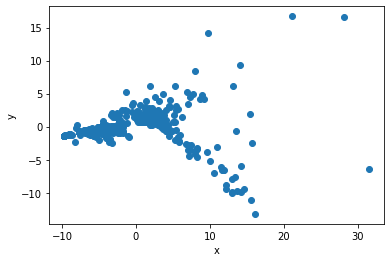

In [70]:
x_axis_data = sDf_pca['x']
y_axis_data = sDf_pca['y']

plt.scatter(x_axis_data, y_axis_data, marker='o')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [9]:
from sklearn.cluster import KMeans

In [71]:
points = sDf.values
kmeans = KMeans(n_clusters=5).fit(points)
kmeans.cluster_centers_

array([[0.01767949, 0.01770513, 0.01658333, 0.01645513, 0.01732051,
        0.01664103, 0.01601282, 0.01582692, 0.01592949, 0.01667949,
        0.01691026, 0.01641667, 0.01595513, 0.0158141 , 0.01530769,
        0.01623077, 0.01583974, 0.01561538, 0.01620513, 0.0156859 ,
        0.01551282, 0.01655769, 0.01736538, 0.01558333, 0.01532051,
        0.01589744, 0.01550641, 0.01448718, 0.01446795, 0.01378205,
        0.01420513, 0.01400641, 0.01558974, 0.01705128, 0.01432692,
        0.01433333, 0.01405128, 0.01380128, 0.01335897, 0.01453205,
        0.01353205, 0.01357051, 0.01489744, 0.01775641, 0.0146859 ,
        0.01523718, 0.01439103, 0.01410897, 0.0144359 , 0.01516667,
        0.01480769, 0.01483974, 0.01430769, 0.01555128, 0.01683974,
        0.01601923, 0.01537821, 0.01471154, 0.01421795, 0.01608333,
        0.01658974, 0.01597436, 0.01589744, 0.01521795, 0.0154359 ,
        0.01651282, 0.01688462, 0.01689103, 0.01772436, 0.01688462,
        0.01920513, 0.02005128, 0.02048718, 0.02

In [11]:
import seaborn as sns

In [72]:
sDf_pca["cluster"] = kmeans.labels_
sDf_pca["date"] = sDf.index

sDf_pca;

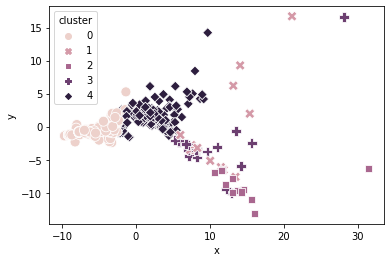

In [73]:
sns.scatterplot(x='x', y="y", hue="cluster", style="cluster", s = 100, data = sDf_pca)
plt.show()

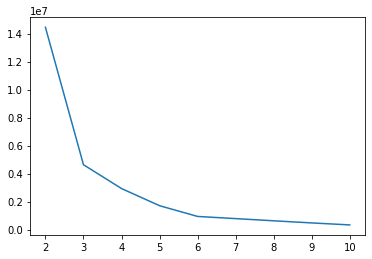

In [74]:
wcss = []
ks = []

for k in range(2,11):
    kmeans = KMeans(n_clusters = k, random_state=0).fit(sDf_pca)
    wcss.append(kmeans.inertia_)
    ks.append(k)
    
plt.plot(ks, wcss)

In [75]:
sDf_pca['cluster']

sDf_pca['date']

0      20180501
1      20180502
2      20180503
3      20180504
4      20180505
         ...   
360    20190426
361    20190427
362    20190428
363    20190429
364    20190430
Name: date, Length: 365, dtype: object

In [76]:
cluster = pd.DataFrame({"cluster": sDf_pca['cluster'], "date": sDf_pca['date']})
cluster

,cluster,date
0,4,20180501
1,4,20180502
2,4,20180503
3,4,20180504
4,4,20180505
...,...,...
360,0,20190426
361,0,20190427
362,4,20190428
363,0,20190429


In [77]:
sDf['date'] = dts
sDf

,0,1,2,3,4,5,6,7,8,9,...,87,88,89,90,91,92,93,94,95,date
20180501,0.085,0.084,0.085,0.084,0.084,0.084,0.084,0.084,0.072,0.065,...,0.084,0.085,0.083,0.066,0.069,0.087,0.092,0.082,0.050,20180501
20180502,0.051,0.050,0.050,0.051,0.050,0.050,0.050,0.046,0.030,0.043,...,0.050,0.050,0.049,0.049,0.049,0.049,0.049,0.049,0.048,20180502
20180503,0.037,0.046,0.088,0.051,0.050,0.044,0.029,0.044,0.050,0.048,...,0.065,0.072,0.085,0.084,0.069,0.064,0.083,0.085,0.077,20180503
20180504,0.064,0.074,0.085,0.084,0.065,0.065,0.086,0.084,0.074,0.064,...,0.081,0.080,0.080,0.084,0.085,0.085,0.085,0.074,0.065,20180504
20180505,0.081,0.054,0.052,0.041,0.032,0.052,0.053,0.045,0.030,0.041,...,0.105,0.098,0.101,0.101,0.101,0.100,0.101,0.100,0.099,20180505
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20190426,0.029,0.025,0.023,0.007,0.008,0.008,0.013,0.024,0.020,0.007,...,0.065,0.071,0.062,0.052,0.055,0.042,0.057,0.050,0.016,20190426
20190427,0.007,0.007,0.007,0.007,0.025,0.021,0.007,0.007,0.007,0.007,...,0.057,0.056,0.064,0.071,0.069,0.066,0.067,0.065,0.083,20190427
20190428,0.075,0.065,0.062,0.065,0.075,0.077,0.059,0.054,0.054,0.054,...,0.066,0.057,0.029,0.008,0.011,0.024,0.022,0.008,0.007,20190428
20190429,0.019,0.024,0.015,0.007,0.007,0.024,0.023,0.008,0.007,0.014,...,0.062,0.047,0.046,0.049,0.055,0.019,0.009,0.007,0.007,20190429


In [78]:
initDf

,20180501,20180502,20180503,20180504,20180505,20180506,20180507,20180508,20180509,20180510,...,20190421,20190422,20190423,20190424,20190425,20190426,20190427,20190428,20190429,20190430
0,0.085,0.051,0.037,0.064,0.081,0.097,0.052,0.086,0.068,0.053,...,0.058,0.020,0.012,0.008,0.022,0.029,0.007,0.075,0.019,0.022
1,0.084,0.050,0.046,0.074,0.054,0.096,0.051,0.085,0.036,0.052,...,0.073,0.007,0.007,0.008,0.024,0.025,0.007,0.065,0.024,0.023
2,0.085,0.050,0.088,0.085,0.052,0.101,0.032,0.084,0.046,0.052,...,0.053,0.007,0.007,0.007,0.014,0.023,0.007,0.062,0.015,0.008
3,0.084,0.051,0.051,0.084,0.041,0.105,0.044,0.052,0.054,0.052,...,0.039,0.007,0.010,0.024,0.007,0.007,0.007,0.065,0.007,0.006
4,0.084,0.050,0.050,0.065,0.032,0.107,0.051,0.051,0.055,0.052,...,0.044,0.017,0.025,0.023,0.007,0.008,0.025,0.075,0.007,0.007
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,0.069,0.049,0.069,0.085,0.101,0.087,0.081,0.083,0.080,0.051,...,0.028,0.007,0.007,0.068,0.048,0.055,0.069,0.011,0.055,0.023
92,0.087,0.049,0.064,0.085,0.100,0.085,0.088,0.067,0.091,0.040,...,0.007,0.007,0.007,0.058,0.059,0.042,0.066,0.024,0.019,0.014
93,0.092,0.049,0.083,0.085,0.101,0.100,0.087,0.080,0.090,0.031,...,0.007,0.007,0.010,0.053,0.050,0.057,0.067,0.022,0.009,0.000
94,0.082,0.049,0.085,0.074,0.100,0.117,0.087,0.082,0.089,0.053,...,0.008,0.021,0.025,0.044,0.043,0.050,0.065,0.008,0.007,0.000


In [79]:
cluster.T

,0,1,2,3,4,5,6,7,8,9,...,355,356,357,358,359,360,361,362,363,364
cluster,4,4,4,4,4,4,4,4,4,4,...,0,0,0,0,0,0,0,4,0,0
date,20180501,20180502,20180503,20180504,20180505,20180506,20180507,20180508,20180509,20180510,...,20190421,20190422,20190423,20190424,20190425,20190426,20190427,20190428,20190429,20190430


In [116]:
merge_data = pd.merge(sDf, cluster)

In [117]:
merge_data

,0,1,2,3,4,5,6,7,8,9,...,88,89,90,91,92,93,94,95,date,cluster
0,0.085,0.084,0.085,0.084,0.084,0.084,0.084,0.084,0.072,0.065,...,0.085,0.083,0.066,0.069,0.087,0.092,0.082,0.050,20180501,4
1,0.051,0.050,0.050,0.051,0.050,0.050,0.050,0.046,0.030,0.043,...,0.050,0.049,0.049,0.049,0.049,0.049,0.049,0.048,20180502,4
2,0.037,0.046,0.088,0.051,0.050,0.044,0.029,0.044,0.050,0.048,...,0.072,0.085,0.084,0.069,0.064,0.083,0.085,0.077,20180503,4
3,0.064,0.074,0.085,0.084,0.065,0.065,0.086,0.084,0.074,0.064,...,0.080,0.080,0.084,0.085,0.085,0.085,0.074,0.065,20180504,4
4,0.081,0.054,0.052,0.041,0.032,0.052,0.053,0.045,0.030,0.041,...,0.098,0.101,0.101,0.101,0.100,0.101,0.100,0.099,20180505,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,0.029,0.025,0.023,0.007,0.008,0.008,0.013,0.024,0.020,0.007,...,0.071,0.062,0.052,0.055,0.042,0.057,0.050,0.016,20190426,0
361,0.007,0.007,0.007,0.007,0.025,0.021,0.007,0.007,0.007,0.007,...,0.056,0.064,0.071,0.069,0.066,0.067,0.065,0.083,20190427,0
362,0.075,0.065,0.062,0.065,0.075,0.077,0.059,0.054,0.054,0.054,...,0.057,0.029,0.008,0.011,0.024,0.022,0.008,0.007,20190428,4
363,0.019,0.024,0.015,0.007,0.007,0.024,0.023,0.008,0.007,0.014,...,0.047,0.046,0.049,0.055,0.019,0.009,0.007,0.007,20190429,0


In [82]:
cluster_5 = merge_data[merge_data['cluster'] == 2]['date']

In [83]:
cluster_5.values.tolist()

['20180724',
 '20180726',
 '20180731',
 '20180801',
 '20180802',
 '20180807',
 '20180808',
 '20180810',
 '20180814',
 '20180815',
 '20180816',
 '20180823']

In [84]:
sDf

,0,1,2,3,4,5,6,7,8,9,...,87,88,89,90,91,92,93,94,95,date
20180501,0.085,0.084,0.085,0.084,0.084,0.084,0.084,0.084,0.072,0.065,...,0.084,0.085,0.083,0.066,0.069,0.087,0.092,0.082,0.050,20180501
20180502,0.051,0.050,0.050,0.051,0.050,0.050,0.050,0.046,0.030,0.043,...,0.050,0.050,0.049,0.049,0.049,0.049,0.049,0.049,0.048,20180502
20180503,0.037,0.046,0.088,0.051,0.050,0.044,0.029,0.044,0.050,0.048,...,0.065,0.072,0.085,0.084,0.069,0.064,0.083,0.085,0.077,20180503
20180504,0.064,0.074,0.085,0.084,0.065,0.065,0.086,0.084,0.074,0.064,...,0.081,0.080,0.080,0.084,0.085,0.085,0.085,0.074,0.065,20180504
20180505,0.081,0.054,0.052,0.041,0.032,0.052,0.053,0.045,0.030,0.041,...,0.105,0.098,0.101,0.101,0.101,0.100,0.101,0.100,0.099,20180505
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20190426,0.029,0.025,0.023,0.007,0.008,0.008,0.013,0.024,0.020,0.007,...,0.065,0.071,0.062,0.052,0.055,0.042,0.057,0.050,0.016,20190426
20190427,0.007,0.007,0.007,0.007,0.025,0.021,0.007,0.007,0.007,0.007,...,0.057,0.056,0.064,0.071,0.069,0.066,0.067,0.065,0.083,20190427
20190428,0.075,0.065,0.062,0.065,0.075,0.077,0.059,0.054,0.054,0.054,...,0.066,0.057,0.029,0.008,0.011,0.024,0.022,0.008,0.007,20190428
20190429,0.019,0.024,0.015,0.007,0.007,0.024,0.023,0.008,0.007,0.014,...,0.062,0.047,0.046,0.049,0.055,0.019,0.009,0.007,0.007,20190429


In [85]:
bakSDf = sDf

In [89]:
sDf = bakSDf

In [118]:
bakMerge = merge_data

In [122]:
merge_data = bakMerge

In [143]:
def SeasonSplit(df, season):
    list = []
    if season == "SPRING":
        list = ["03", "04", "05"]
    elif season == "SUMMER":
        list = ["06", "07", "08"]
    elif season == "AUTUMN":
        list = ["09", "10", "11"]
    elif season == "WINTER":
        list = ["12", "01", "02"]
    
    return df[df['month'].isin(list)]

In [123]:
merge_data

,0,1,2,3,4,5,6,7,8,9,...,88,89,90,91,92,93,94,95,date,cluster
0,0.085,0.084,0.085,0.084,0.084,0.084,0.084,0.084,0.072,0.065,...,0.085,0.083,0.066,0.069,0.087,0.092,0.082,0.050,20180501,4
1,0.051,0.050,0.050,0.051,0.050,0.050,0.050,0.046,0.030,0.043,...,0.050,0.049,0.049,0.049,0.049,0.049,0.049,0.048,20180502,4
2,0.037,0.046,0.088,0.051,0.050,0.044,0.029,0.044,0.050,0.048,...,0.072,0.085,0.084,0.069,0.064,0.083,0.085,0.077,20180503,4
3,0.064,0.074,0.085,0.084,0.065,0.065,0.086,0.084,0.074,0.064,...,0.080,0.080,0.084,0.085,0.085,0.085,0.074,0.065,20180504,4
4,0.081,0.054,0.052,0.041,0.032,0.052,0.053,0.045,0.030,0.041,...,0.098,0.101,0.101,0.101,0.100,0.101,0.100,0.099,20180505,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,0.029,0.025,0.023,0.007,0.008,0.008,0.013,0.024,0.020,0.007,...,0.071,0.062,0.052,0.055,0.042,0.057,0.050,0.016,20190426,0
361,0.007,0.007,0.007,0.007,0.025,0.021,0.007,0.007,0.007,0.007,...,0.056,0.064,0.071,0.069,0.066,0.067,0.065,0.083,20190427,0
362,0.075,0.065,0.062,0.065,0.075,0.077,0.059,0.054,0.054,0.054,...,0.057,0.029,0.008,0.011,0.024,0.022,0.008,0.007,20190428,4
363,0.019,0.024,0.015,0.007,0.007,0.024,0.023,0.008,0.007,0.014,...,0.047,0.046,0.049,0.055,0.019,0.009,0.007,0.007,20190429,0


In [132]:
month = []
for date in merge_data['date']:
    month.append(date[4:6])

merge_data['month'] = month

In [133]:
merge_data

,0,1,2,3,4,5,6,7,8,9,...,89,90,91,92,93,94,95,date,cluster,month
0,0.085,0.084,0.085,0.084,0.084,0.084,0.084,0.084,0.072,0.065,...,0.083,0.066,0.069,0.087,0.092,0.082,0.050,20180501,4,05
1,0.051,0.050,0.050,0.051,0.050,0.050,0.050,0.046,0.030,0.043,...,0.049,0.049,0.049,0.049,0.049,0.049,0.048,20180502,4,05
2,0.037,0.046,0.088,0.051,0.050,0.044,0.029,0.044,0.050,0.048,...,0.085,0.084,0.069,0.064,0.083,0.085,0.077,20180503,4,05
3,0.064,0.074,0.085,0.084,0.065,0.065,0.086,0.084,0.074,0.064,...,0.080,0.084,0.085,0.085,0.085,0.074,0.065,20180504,4,05
4,0.081,0.054,0.052,0.041,0.032,0.052,0.053,0.045,0.030,0.041,...,0.101,0.101,0.101,0.100,0.101,0.100,0.099,20180505,4,05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,0.029,0.025,0.023,0.007,0.008,0.008,0.013,0.024,0.020,0.007,...,0.062,0.052,0.055,0.042,0.057,0.050,0.016,20190426,0,04
361,0.007,0.007,0.007,0.007,0.025,0.021,0.007,0.007,0.007,0.007,...,0.064,0.071,0.069,0.066,0.067,0.065,0.083,20190427,0,04
362,0.075,0.065,0.062,0.065,0.075,0.077,0.059,0.054,0.054,0.054,...,0.029,0.008,0.011,0.024,0.022,0.008,0.007,20190428,4,04
363,0.019,0.024,0.015,0.007,0.007,0.024,0.023,0.008,0.007,0.014,...,0.046,0.049,0.055,0.019,0.009,0.007,0.007,20190429,0,04


In [144]:
SeasonSplit(merge_data, "SUMMER")

,0,1,2,3,4,5,6,7,8,9,...,89,90,91,92,93,94,95,date,cluster,month
31,0.051,0.051,0.050,0.051,0.051,0.050,0.051,0.078,0.087,0.059,...,0.055,0.054,0.055,0.054,0.055,0.055,0.054,20180601,4,06
32,0.037,0.049,0.062,0.061,0.044,0.060,0.057,0.057,0.057,0.056,...,0.054,0.054,0.054,0.054,0.055,0.054,0.055,20180602,4,06
33,0.055,0.054,0.037,0.050,0.055,0.056,0.054,0.055,0.044,0.042,...,0.113,0.112,0.110,0.096,0.064,0.057,0.058,20180603,4,06
34,0.056,0.052,0.051,0.051,0.051,0.050,0.051,0.050,0.051,0.050,...,0.083,0.078,0.077,0.059,0.058,0.058,0.058,20180604,4,06
35,0.051,0.053,0.058,0.057,0.057,0.057,0.057,0.057,0.057,0.057,...,0.085,0.085,0.084,0.084,0.085,0.085,0.084,20180605,4,06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118,0.146,0.197,0.117,0.121,0.080,0.057,0.057,0.050,0.058,0.058,...,0.081,0.079,0.073,0.082,0.071,0.086,0.238,20180827,4,08
119,0.163,0.149,0.119,0.134,0.148,0.141,0.099,0.059,0.058,0.058,...,0.095,0.096,0.091,0.090,0.093,0.088,0.176,20180828,4,08
120,0.228,0.148,0.136,0.097,0.050,0.058,0.054,0.054,0.058,0.048,...,0.180,0.157,0.130,0.141,0.124,0.133,0.131,20180829,1,08
121,0.137,0.123,0.101,0.057,0.122,0.169,0.134,0.152,0.122,0.048,...,0.052,0.052,0.043,0.063,0.107,0.293,0.138,20180830,4,08
